In [67]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os

from paddleocr import PaddleOCR


from PIL import Image
from paddleocr import TextRecognition
from paddleocr import TextDetection

from helpers.inspector import inspect_object



In [70]:
# Bildpfad
image_path = "./data/Schneckenwelle.jpg"
image = Image.open(image_path).convert("RGB")
img_np = np.array(image)


In [71]:
inspect_object(img_np, name="img_np")


--- Inspecting: img_np ---
Type: <class 'numpy.ndarray'>
Shape: (955, 1350, 3)
Dtype: uint8
Sample data (flattened): [255 255 255 255 255 255 255 255 255 255]




In [72]:
# Text Detection Modell (PP-OCRv5)
detector = TextDetection(model_name="PP-OCRv5_server_det")

# Run detection
detection_result = detector.predict(input=[img_np])
print(f"Gefundene Textboxen: {detection_result}")

for res in detection_result:
    res.print()
    res.save_to_img(save_path="./output/det/")
    res.save_to_json(save_path="./output/det/res.json")
    
    
det_res = detection_result[0]


MKL-DNN is not available. Using `paddle` instead.
Using official model (PP-OCRv5_server_det), the model files will be automatically downloaded and saved in /Users/gerhardkarbeutz/.paddlex/official_models.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

{'res': {'input_path': None, 'page_index': None, 'dt_polys': array([[[879, 897],
        ...,
        [879, 907]],

       ...,

       [[944,  85],
        ...,
        [944, 112]]], dtype=int16), 'dt_scores': [0.7945580862772961, 0.9304698371949295, 0.7561921024698985, 0.7281057972460986, 0.6177545873532918, 0.9268560577239398, 0.91293188696198, 0.9883202606317948, 0.9056529998779297, 0.8352959785682846, 0.7406655207315149, 0.9759778354905153, 0.8639507440863119, 0.9579723698319867, 0.9449299596482889, 0.8859441453116198, 0.6722485486079346, 0.8346600553227795, 0.9766052586043844, 0.9586822539129282, 0.9713346474512946, 0.8740434740971336, 0.9100476460459096, 0.9166111927479506, 0.8790461783781648, 0.8158156524101893, 0.7580048458029827, 0.9308460106558915, 0.9785615130359135, 0.9716165825258941, 0.9519295502115379, 0.9490360067015694, 0.9714873020350934, 0.8731619566506958, 0.9550017527750005, 0.9166160068091224, 0.7894653652540662, 0.7852050672805534, 0.9324886446353048, 0.93795921

Gefundene Textboxen: [{'input_path': None, 'page_index': None, 'input_img': array([[[255, ..., 255],
        ...,
        [255, ..., 255]],

       ...,

       [[255, ..., 255],
        ...,
        [255, ..., 255]]], dtype=uint8), 'dt_polys': array([[[879, 897],
        ...,
        [879, 907]],

       ...,

       [[944,  85],
        ...,
        [944, 112]]], dtype=int16), 'dt_scores': [0.7945580862772961, 0.9304698371949295, 0.7561921024698985, 0.7281057972460986, 0.6177545873532918, 0.9268560577239398, 0.91293188696198, 0.9883202606317948, 0.9056529998779297, 0.8352959785682846, 0.7406655207315149, 0.9759778354905153, 0.8639507440863119, 0.9579723698319867, 0.9449299596482889, 0.8859441453116198, 0.6722485486079346, 0.8346600553227795, 0.9766052586043844, 0.9586822539129282, 0.9713346474512946, 0.8740434740971336, 0.9100476460459096, 0.9166111927479506, 0.8790461783781648, 0.8158156524101893, 0.7580048458029827, 0.9308460106558915, 0.9785615130359135, 0.9716165825258941, 0.9519

In [41]:
print("Verfügbare Attribute:")
for attr in dir(det_res):
    if not attr.startswith("_"):
        print(f" - {attr}")

Verfügbare Attribute:
 - clear
 - copy
 - fromkeys
 - get
 - img
 - items
 - json
 - keys
 - pop
 - popitem
 - print
 - save_all
 - save_to_img
 - save_to_json
 - setdefault
 - str
 - update
 - values


In [49]:
print(det_res.keys())


dict_keys(['input_path', 'page_index', 'input_img', 'dt_polys', 'dt_scores'])


In [51]:
inspect_object(det_res)

--- Inspecting: object ---
Type: <class 'paddlex.inference.models.text_detection.result.TextDetResult'>
Keys: ['input_path', 'page_index', 'input_img', 'dt_polys', 'dt_scores']
Key: input_path -> Type: <class 'NoneType'>
Key: page_index -> Type: <class 'NoneType'>
Key: input_img -> Type: <class 'numpy.ndarray'>
Key: dt_polys -> Type: <class 'numpy.ndarray'>
Key: dt_scores -> Type: <class 'list'>




In [53]:
print(det_res["dt_polys"] )

[[[879 897]
  ...
  [879 907]]

 ...

 [[944  85]
  ...
  [944 112]]]


In [77]:
np.set_printoptions(threshold=np.inf)  # Print everything


In [ ]:
print("Polygons:", det_res["dt_polys"][:3])  # First 3 boxes
print("Scores:", det_res["dt_scores"][:3])
print("Images:", det_res["input_img"])





Polygons: [[[879 897]
  [900 897]
  [900 907]
  [879 907]]

 [[844 897]
  [873 897]
  [873 907]
  [844 907]]

 [[783 892]
  [820 896]
  [819 911]
  [781 908]]]
Scores: [0.7945580862772961, 0.9304698371949295, 0.7561921024698985]


In [107]:
npimg = det_res["input_img"]



def calculate_image_metrics(input_img):
    shape = input_img.shape
    H, W, _ = shape
    total_pixels = H * W
    
    
    non_white_mask = np.any(input_img != 255, axis=-1)

    # Get  coordinates of non-white pixels
    non_white_coords = np.column_stack(np.where(non_white_mask))
    
    
    black_pixels = non_white_coords.shape[0]
    
    
    print(f"Dimension: {W}x{H}")
    print(f"Shape: {shape}")
    print(f"Total Pixels: {total_pixels}")
    print(f"Black Pixels: {black_pixels}")
    print(f"Black Pixel Ratio: {(black_pixels)/total_pixels}")


calculate_image_metrics(npimg)


Dimension: 1350x955
Shape: (955, 1350, 3)
Total Pixels: 1289250
Black Pixels: 186820
Black Pixel Ratio: 0.14490595307349233


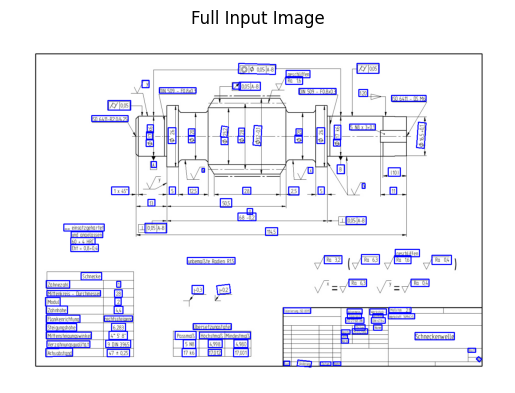

In [86]:
plt.imshow(det_res["input_img"])
plt.title("Full Input Image")
plt.axis("off")
plt.show()



## ✅ **1. What do the numbers in `dt_polys` and `dt_scores` mean?**

### 🔹 `dt_polys`:

* This is a list or array of **detected bounding polygons**.
* Each polygon is usually a **list of 4 points (quadrilateral)** — one for each corner of a detected text box.
* Each point is `[x, y]`, pixel coordinates in the image.


This means the detector found a **rectangle-shaped text region** with corners at:

* Top-left: (879, 897)
* Top-right: (900, 897)
* Bottom-right: (900, 907)
* Bottom-left: (879, 907)

So this is a horizontal text box, 21 pixels wide and 10 pixels tall.

---

### 🔹 `dt_scores`:

* These are **confidence scores** between `0` and `1` that represent how likely the model thinks the detected polygon actually contains text.
* Higher is better. E.g.:

  * `0.99` = very confident
  * `0.40` = likely noise or false detection

They match one-to-one with the `dt_polys` list:

```python
poly[0] ←→ score[0]  
poly[1] ←→ score[1]  
...
```



In [59]:
print(dir(det_res))


['__class__', '__class_getitem__', '__contains__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__ior__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__or__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__ror__', '__setattr__', '__setitem__', '__sizeof__', '__slotnames__', '__str__', '__subclasshook__', '__weakref__', '_deps_', '_get_input_fn', '_img_writer', '_json_writer', '_rand_fn', '_save_funcs', '_to_img', '_to_json', '_to_str', 'clear', 'copy', 'fromkeys', 'get', 'img', 'items', 'json', 'keys', 'pop', 'popitem', 'print', 'save_all', 'save_to_img', 'save_to_json', 'setdefault', 'str', 'update', 'values']


In [60]:
print(det_res.__dict__)


{'_save_funcs': [<bound method JsonMixin.save_to_json of {'input_path': None, 'page_index': None, 'input_img': array([[[255, ..., 255],
        ...,
        [255, ..., 255]],

       ...,

       [[255, ..., 255],
        ...,
        [255, ..., 255]]], dtype=uint8), 'dt_polys': array([[[879, 897],
        ...,
        [879, 907]],

       ...,

       [[944,  85],
        ...,
        [944, 112]]], dtype=int16), 'dt_scores': [0.7945580862772961, 0.9304698371949295, 0.7561921024698985, 0.7281057972460986, 0.6177545873532918, 0.9268560577239398, 0.91293188696198, 0.9883202606317948, 0.9056529998779297, 0.8352959785682846, 0.7406655207315149, 0.9759778354905153, 0.8639507440863119, 0.9579723698319867, 0.9449299596482889, 0.8859441453116198, 0.6722485486079346, 0.8346600553227795, 0.9766052586043844, 0.9586822539129282, 0.9713346474512946, 0.8740434740971336, 0.9100476460459096, 0.9166111927479506, 0.8790461783781648, 0.8158156524101893, 0.7580048458029827, 0.9308460106558915, 0.978561513

In [75]:
import pprint
pprint.pprint(det_res.__dict__)

{'_img_writer': <paddlex.inference.utils.io.writers.ImageWriter object at 0x33087d960>,
 '_json_writer': <paddlex.inference.utils.io.writers.JsonWriter object at 0x33087eb60>,
 '_rand_fn': '1751468572_3911',
 '_save_funcs': [<bound method JsonMixin.save_to_json of {'input_path': None, 'page_index': None, 'input_img': array([[[255, ..., 255],
        ...,
        [255, ..., 255]],

       ...,

       [[255, ..., 255],
        ...,
        [255, ..., 255]]], dtype=uint8), 'dt_polys': array([[[879, 897],
        ...,
        [879, 907]],

       ...,

       [[944,  85],
        ...,
        [944, 112]]], dtype=int16), 'dt_scores': [0.7945580862772961, 0.9304698371949295, 0.7561921024698985, 0.7281057972460986, 0.6177545873532918, 0.9268560577239398, 0.91293188696198, 0.9883202606317948, 0.9056529998779297, 0.8352959785682846, 0.7406655207315149, 0.9759778354905153, 0.8639507440863119, 0.9579723698319867, 0.9449299596482889, 0.8859441453116198, 0.6722485486079346, 0.8346600553227795, 0.9

In [73]:
image = det_res["input_img"]         # ← Bild als NumPy-Array
boxes = det_res["dt_polys"]          # ← Liste der Textboxen
scores = det_res["dt_scores"]        # ← Liste der Confidence-Werte


In [74]:

def crop_boxes(image, boxes):
    crops = []
    for box in boxes:
        # Hole die Koordinaten (int)
        box = np.array(box).astype(np.int32)

        # Berechne Bounding-Box als Rechteck
        rect = cv2.boundingRect(box)
        x, y, w, h = rect

        # Crop aus Bild schneiden
        crop = image[y:y+h, x:x+w]
        crops.append(crop)
    return crops


In [47]:
crops = crop_boxes(image, boxes)
print(f"{len(crops)} Textregionen extrahiert.")


115 Textregionen extrahiert.


In [48]:
inspect_object(crops)

--- Inspecting: object ---
Type: <class 'list'>
Length: 115
[0] -> Type: <class 'numpy.ndarray'>
[1] -> Type: <class 'numpy.ndarray'>
[2] -> Type: <class 'numpy.ndarray'>
[3] -> Type: <class 'numpy.ndarray'>
[4] -> Type: <class 'numpy.ndarray'>




In [22]:
recognizer = TextRecognition(model_name="PP-OCRv5_server_rec")
output = recognizer.predict(input=crops, batch_size=1)

# Jeder Crop separat speichern
for idx, res in enumerate(output):
    res.print()

    save_folder = f"./output/rec/crop_{idx}"
    os.makedirs(save_folder, exist_ok=True)

    res.save_to_img(save_path=save_folder)
    res.save_to_json(save_path=os.path.join(save_folder, "res.json"))


MKL-DNN is not available. Using `paddle` instead.
Using official model (PP-OCRv5_server_rec), the model files will be automatically downloaded and saved in /Users/gerhardkarbeutz/.paddlex/official_models.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

{'res': {'input_path': None, 'page_index': None, 'rec_text': '', 'rec_score': 0.0}}
There is not input file name as reference for name of saved result file. So the saved result file would be named with timestamp and random number: `1751465641_8808`.
{'res': {'input_path': None, 'page_index': None, 'rec_text': 'Da', 'rec_score': 0.4286233186721802}}
There is not input file name as reference for name of saved result file. So the saved result file would be named with timestamp and random number: `1751465641_8557`.
{'res': {'input_path': None, 'page_index': None, 'rec_text': 'Anderung', 'rec_score': 0.7714438438415527}}
There is not input file name as reference for name of saved result file. So the saved result file would be named with timestamp and random number: `1751465641_2701`.
{'res': {'input_path': None, 'page_index': None, 'rec_text': '', 'rec_score': 0.0}}
There is not input file name as reference for name of saved result file. So the saved result file would be named with timestam

ValueError: font size must be greater than 0, not 0

In [ ]:
print("Verfügbare Attribute:")
for attr in dir(output):
    if not attr.startswith("_"):
        print(f" - {attr}")

In [ ]:
print(output)

In [ ]:
results_list = []
for idx, res in enumerate(output):
    results_list.append({
        "index": idx,
        "text": res['rec_text'],
        "score": res['rec_score']
    })

import pandas as pd
pd.DataFrame(results_list).to_csv("./output/rec_summary.csv", index=False)
